In [1]:
import pandas as pd
import seaborn as sns
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
from dython.nominal import identify_nominal_columns
from scipy import stats
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import mca
import prince

In [2]:
# sleeps = pd.read_csv("original_data/sleep.csv")
sleeps = pd.read_csv("original_data/sleep.csv")

# grades = pd.read_csv("original_data/grades_numeric.csv")
grades = pd.read_csv("original_data/grade_numeric.csv")


In [3]:
sleep_grade = pd.merge(sleeps, grades, on=['egoid'])
sleep_grade.to_csv('merged_data/sleep_grade.csv', index=False)

# sleep_grade = pd.read_csv('sleep_grade_data/sleep_grade_0.csv')
# sleep_grade = pd.read_csv('merged_data/sleep_grade_org.csv')


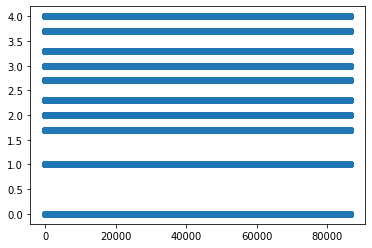

In [14]:
x = sleep_grade.timetobed
y = sleep_grade.grade

plt.scatter(x, y)

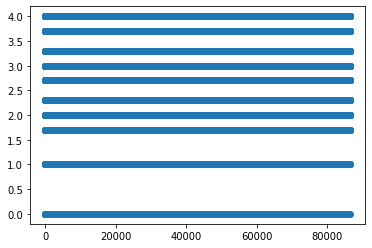

In [15]:
x = sleep_grade.timeoutofbed
y = sleep_grade.grade

plt.scatter(x, y)

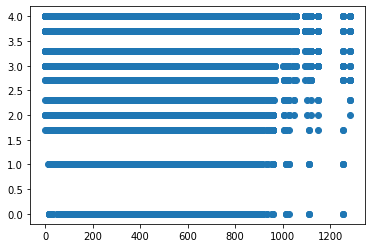

In [16]:
x = sleep_grade.bedtimedur
y = sleep_grade.grade

plt.scatter(x, y)

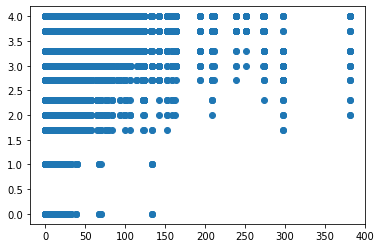

In [17]:
x = sleep_grade.minstofallasleep
y = sleep_grade.grade

plt.scatter(x, y)

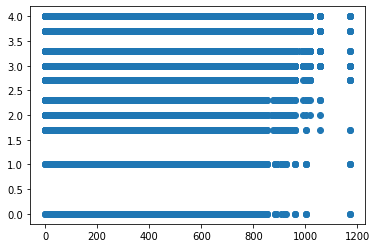

In [18]:
x = sleep_grade.minsasleep
y = sleep_grade.grade

plt.scatter(x, y)

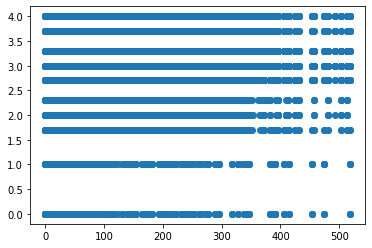

In [19]:
x = sleep_grade.minsawake
y = sleep_grade.grade

plt.scatter(x, y)

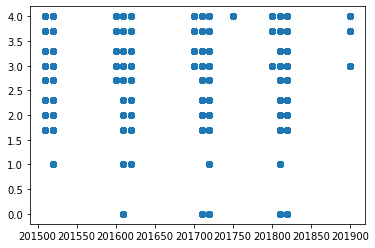

In [20]:
x = sleep_grade.AcademicPeriod
y = sleep_grade.grade

plt.scatter(x, y)

<AxesSubplot:xlabel='minstofallasleep', ylabel='grade'>

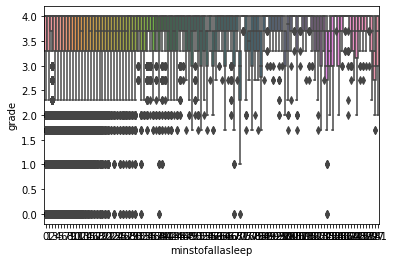

In [3]:
sns.boxplot(x=sleep_grade.minstofallasleep, y=sleep_grade.grade)

<AxesSubplot:xlabel='minsasleep', ylabel='grade'>

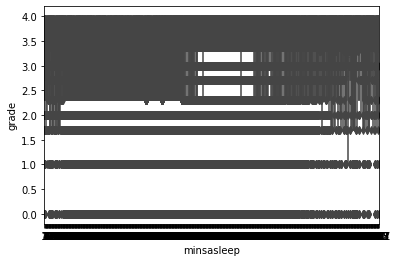

In [4]:
sns.boxplot(x=sleep_grade.minsasleep, y=sleep_grade.grade)

In [21]:
pearson = sleep_grade['grade'].corr(sleep_grade['minsasleep'])
spearmen= sleep_grade['grade'].corr(sleep_grade['minsasleep'], method='spearman')
kendall = sleep_grade['grade'].corr(sleep_grade['minsasleep'], method='kendall')

print('Pearson:', pearson)
print('Spearmen:', spearmen)
print('Kendall:', kendall)

Pearson: 0.05865202941865284
Spearmen: 0.05699127947227274
Kendall: 0.04314246374913603


C:\Users\Eren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

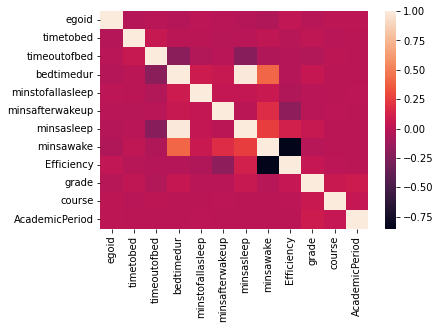

In [10]:
sns.heatmap(sleep_grade.corr())

<AxesSubplot:>

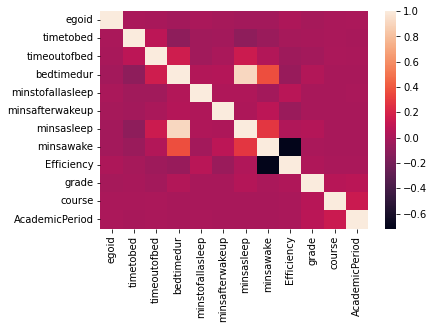

In [11]:
sns.heatmap(sleep_grade.corr(method='kendall'))

<AxesSubplot:>

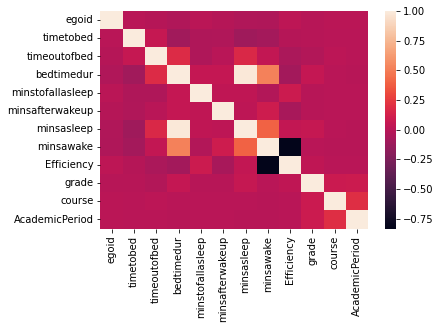

In [12]:
sns.heatmap(sleep_grade.corr(method='spearman'))

0.015333768802501924


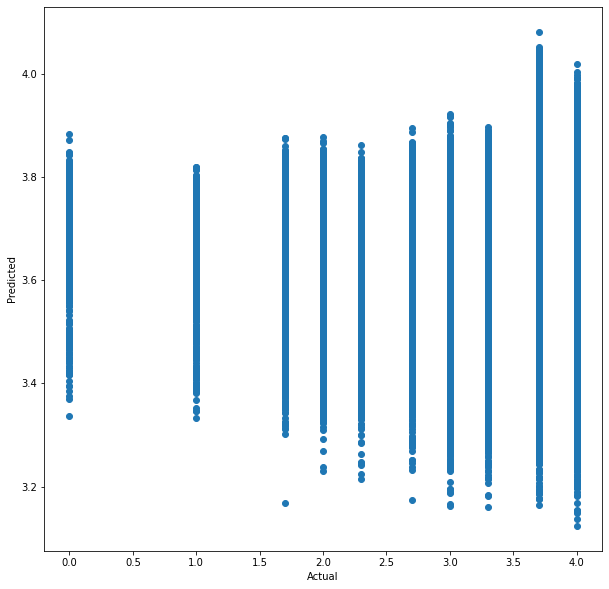

In [15]:
x = sleep_grade[['egoid', 'timetobed', 'bedtimedur', 'minstofallasleep', 'minsafterwakeup', 'minsasleep', 'minsawake', 'Efficiency', 'course', 'AcademicPeriod']].values
y = sleep_grade['grade'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ml = LinearRegression()
ml.fit(x_train, y_train)

y_pred = ml.predict(x_test)
print(r2_score(y_test, y_pred))

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

C:\Users\Eren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.4743056885220449


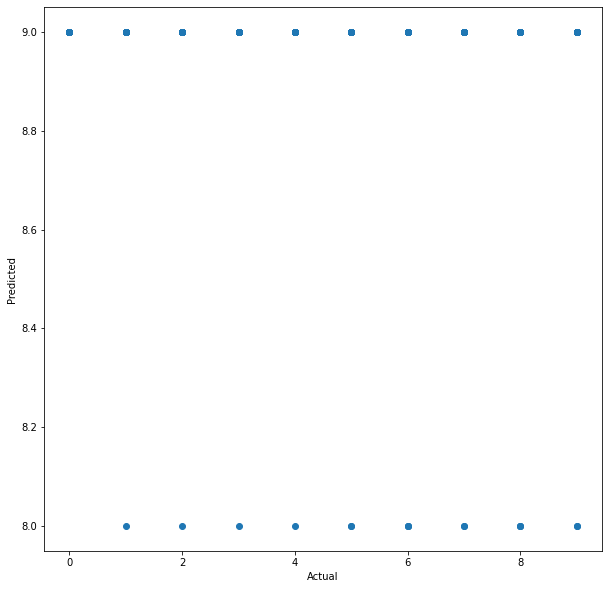

In [5]:
sleep_grade_temp = sleep_grade.dropna()
x = sleep_grade_temp[['bedtimedur']].values
y = sleep_grade_temp['grade'].values

y = y.reshape(-1, 1)
encoder = OrdinalEncoder()
encoder.fit(y)
y = encoder.transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
ml = LogisticRegression()
ml.fit(x_train, y_train)

y_pred = ml.predict(x_test)
print(r2_score(y_test, y_pred))

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [6]:
from scripts.correlation_analysis import corr_analysis

corr_analysis(sleep_grade['minsasleep'], sleep_grade['grade'])

0.05865202975709573

In [18]:
sleep_grade_temp = sleep_grade[['grade', 'minsasleep', 'Efficiency', 'bedtimedur', 'minstofallasleep', 'minsafterwakeup']]
sleep_grade_temp = sleep_grade_temp.dropna()
prince_mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
sleep_grade_mca = prince_mca.fit(sleep_grade_temp)

ax = sleep_grade_mca.plot_coordinates(
        X=sleep_grade_temp,
        ax=None,
        figsize=(8, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax = mca.plot_coordinates(
#      X=X,
#      ax=None,
#      figsize=(6, 6),
#      show_row_points=True,
#      row_points_size=10,
#      show_row_labels=False,
#      show_column_points=True,
#      column_points_size=30,
#      show_column_labels=False,
#      legend_n_cols=1
#      )

KeyboardInterrupt: 

ZeroDivisionError: float division by zero

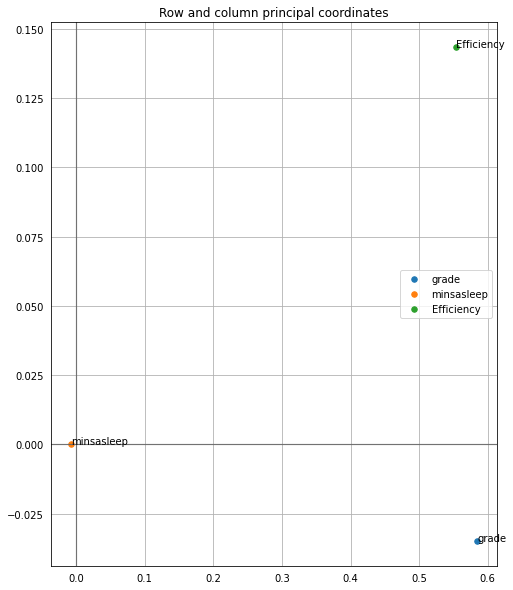

In [9]:
sleep_grade_temp = sleep_grade[['grade', 'minsasleep', 'Efficiency']]
for col in sleep_grade_temp.columns:
    sleep_grade_temp = sleep_grade_temp.loc[sleep_grade_temp[col] > 0]

prince_mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
sleep_grade_mca = prince_mca.fit(sleep_grade_temp)

ax = sleep_grade_mca.plot_coordinates(
        X=sleep_grade_temp,
        ax=None,
        figsize=(8, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax = mca.plot_coordinates(
#      X=X,
#      ax=None,
#      figsize=(6, 6),
#      show_row_points=True,
#      row_points_size=10,
#      show_row_labels=False,
#      show_column_points=True,
#      column_points_size=30,
#      show_column_labels=False,
#      legend_n_cols=1
#      )

In [4]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
sleep_grade_temp = sleep_grade[['grade', 'minsasleep', 'Efficiency', 'bedtimedur', 'minstofallasleep', 'minsafterwakeup']]
sleep_grade_temp = sleep_grade_temp.dropna()
chi_square_value, p_value = calculate_bartlett_sphericity(sleep_grade_temp)
chi_square_value, p_value

(47482128.328172565, 0.0)

In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo
sleep_grade_temp = sleep_grade[['grade', 'minsasleep', 'Efficiency', 'bedtimedur', 'minstofallasleep', 'minsafterwakeup']]
sleep_grade_temp = sleep_grade_temp.dropna()
kmo_all, kmo_model = calculate_kmo(sleep_grade_temp)
kmo_all, kmo_model

(array([0.96433199, 0.31142185, 0.02737526, 0.30978956, 0.01763828,
        0.08579946]),
 0.22208003698615889)

In [7]:
from factor_analyzer import FactorAnalyzer
sleep_grade_temp = sleep_grade[['grade', 'minsasleep', 'Efficiency', 'bedtimedur', 'minstofallasleep', 'minsafterwakeup']]
sleep_grade_temp = sleep_grade_temp.dropna()
fa = FactorAnalyzer(rotation=None)
fa.fit(sleep_grade_temp)
fa.get_eigenvalues()

(array([2.00297302e+00, 1.22113564e+00, 9.89114288e-01, 9.76284032e-01,
        8.08659747e-01, 1.83326414e-03]),
 array([ 1.99879938e+00,  1.00117929e+00,  6.41128769e-01,  2.58708155e-03,
        -1.09324841e-05, -8.04974607e-03]))

In [8]:
fa.get_factor_variance()

(array([1.99352407, 1.00114105, 0.64096873]),
 array([0.33225401, 0.16685684, 0.10682812]),
 array([0.33225401, 0.49911085, 0.60593897]))